# Titanic Survival Prediction using Machine Learning 

## Introduction

Ce projet vise à prédire la survie des passagers du Titanic en utilisant des techniques de machine learning. En analysant les caractéristiques des passagers (âge, sexe, classe, etc.), nous allons construire plusieurs modèles pour identifier les facteurs clés qui influencent les chances de survie.

Les étapes incluent :
1. **Exploration des données (EDA)** pour comprendre les tendances.
2. **Feature Engineering** pour améliorer les performances des modèles.
3. **Sélection et entraînement des modèles** (Random Forest, XGBoost, SVM).
4. **Évaluation des modèles** pour choisir le plus performant.


## Préparation de l'environnement 

Avant de commencer l'analyse, nous devons configurer notre environnement de travail en important les bibliothèques nécessaires et en chargeant les données.

1. **Importation des bibliothèques** : Nous allons utiliser `pandas` pour la manipulation des données, `numpy` pour les opérations mathématiques, et `matplotlib`/`seaborn` pour la visualisation.
   
2. **Chargement des datasets** : Les fichiers `train.csv` et `test.csv` fournis par Kaggle contiennent les informations des passagers. Nous allons utiliser `train.csv` pour entraîner nos modèles et `test.csv` pour générer des prédictions.

Voyons maintenant comment importer ces bibliothèques et charger les données.


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
train_data = pd.read_csv("train.csv", sep=";")
test_data = pd.read_csv("test.csv", sep=";")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploration des Données (EDA) 

Avant de passer à la modélisation, nous allons explorer le dataset pour comprendre sa structure et identifier les patterns potentiels. Cette étape est cruciale pour détecter les valeurs manquantes, les distributions des variables et les corrélations qui peuvent influencer la survie des passagers.


In [70]:
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
train_data.info()
train_data.describe()

Train data shape: (891, 12)
Test data shape: (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analyse préliminaire des données 

### 1 - Description des variables

Avant d'explorer les données, il est essentiel de comprendre la signification de chaque variable présente dans le dataset.

- **`PassengerId`** : Identifiant unique pour chaque passager.
- **`Survived`** : Variable cible indiquant si le passager a survécu (1) ou non (0).
- **`Pclass`** : Classe du billet du passager (1 = 1ère classe, 2 = 2ème classe, 3 = 3ème classe).
- **`Name`** : Nom complet du passager.
- **`Sex`** : Sexe du passager (male/female).
- **`Age`** : Âge du passager en années.(Des fractions sont présentes pour les enfants en bas âge).
- **`SibSp`** : Nombre de frères et sœurs ou conjoints à bord du Titanic.
- **`Parch`** : Nombre de parents ou d'enfants à bord du Titanic.
- **`Ticket`** : Numéro de billet du passager.
- **`Fare`** : Tarif payé pour le billet.
- **`Cabin`** : Numéro de cabine du passager.
- **`Embarked`** : Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).
  

### 2 - Structure du dataset

- **Nombre de lignes et colonnes** :
  - Le dataset d'entraînement contient **891 lignes** et **12 colonnes**.
  - Le dataset de test contient **418 lignes** et **11 colonnes** (il manque la colonne `Survived` car c'est la variable à prédire).

- **Types de données** :
  - Les colonnes  `PassengerId`, `Survived`, `Pclass`, `SibSp`, `Parch` sont de type **int64**.
  - Les colonnes `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked` sont de type **object** (catégorielles ou textuelles).
  - `Age` et `Fare` sont des variables numériques de type **float64**.


### 3 - Valeurs manquantes 

- **`Age`** : 714 valeurs non-nulles sur 891, donc **177 valeurs manquantes** (~20% des données). 
- **`Cabin`** : Seulement 204 valeurs non-nulles sur 891, ce qui signifie **687 valeurs manquantes** (~77%). 
- **`Embarked`** : 889 valeurs non-nulles sur 891, donc **2 valeurs manquantes**.


### 4 - Statistiques descriptives 

- **`Survived`** :
  - Moyenne = **0.38**, ce qui signifie que **38% des passagers ont survécu**, et **62% n'ont pas survécu**.  
  - Le dataset est légèrement déséquilibré.

- **`Pclass`** (Classe des passagers) :
  - Moyenne = **2.3**, indiquant que la majorité des passagers appartiennent à la **2ᵉ ou 3ᵉ classe**.
  - La classe pourrait être un facteur déterminant pour la survie.

- **`Age`** :
  - Moyenne = **29.7 ans**, avec un minimum de **0.42 ans** (bébé) et un maximum de **80 ans**.

- **`Fare`** :
  - Moyenne = **32.2**, mais le maximum atteint **512.33**, ce qui indique des **valeurs extrêmes (outliers)**.
.


### 5 - Prochaines étapes 

- **Traitement des valeurs manquantes** et préparation des données pour la modélisation.
- **Visualisation de la variable cible `Survived`** pour comprendre la répartition des survivants.
- **Analyse des corrélations** entre les variables et la survie.




## Traitement des valeurs manquantes

Avant d'analyser les relations entre les variables et la survie, il est essentiel de traiter les valeurs manquantes dans le dataset. Les valeurs manquantes peuvent fausser les résultats des analyses statistiques et des modèles de machine learning si elles ne sont pas correctement gérées.

### Stratégie d'imputation :

- **`Age`** : Environ 20 % des valeurs sont manquantes. L'imputation sera effectuée en utilisant la **médiane** de l'âge, car cette méthode est robuste face aux valeurs extrêmes.
  
- **`Embarked`** : Deux valeurs manquantes seulement. Nous remplacerons ces valeurs par la **modalité la plus fréquente** (mode), car l'impact de cette imputation est négligeable.

- **`Cabin`** : Environ 77 % des valeurs sont manquantes. Étant donné le volume important de données manquantes, nous considérons cette approche : extraction de la première lettre de `Cabin` pour représenter la section de la cabine, et imputation des valeurs manquantes avec une catégorie `'U'` (Unknown).

Après avoir traité les valeurs manquantes, nous vérifierons l'intégrité des données avant de passer à l'analyse des valeurs extrêmes.


In [73]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Cabin'] = train_data['Cabin'].str[0].fillna('U')
print("Valeurs manquantes après traitement :\n")
print(train_data.isnull().sum())


Valeurs manquantes après traitement :

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Détection et traitement des valeurs extrêmes (outliers)

Avant d'analyser les relations entre les variables et la survie, il est important de détecter et de traiter les valeurs extrêmes (outliers). Les outliers peuvent fausser les statistiques descriptives et influencer négativement la performance des modèles de machine learning.

### Méthodologie :

- **Visualisation des outliers** : Nous utilisons des boxplots pour identifier les valeurs extrêmes dans les variables continues, notamment **`Fare`** (tarif du billet) et **`Age`** (âge des passagers).
  
- **Traitement des outliers** :
  - Pour **`Fare`**, nous appliquerons une limitation des valeurs extrêmes (winsorization) en plafonnant les valeurs au **95e percentile**.
  - Pour **`Age`**, les outliers seront analysés pour déterminer s'ils nécessitent un traitement spécifique ou s'ils peuvent être conservés.

Ce nettoyage garantit des analyses plus fiables et améliore la qualité des modèles prédictifs.


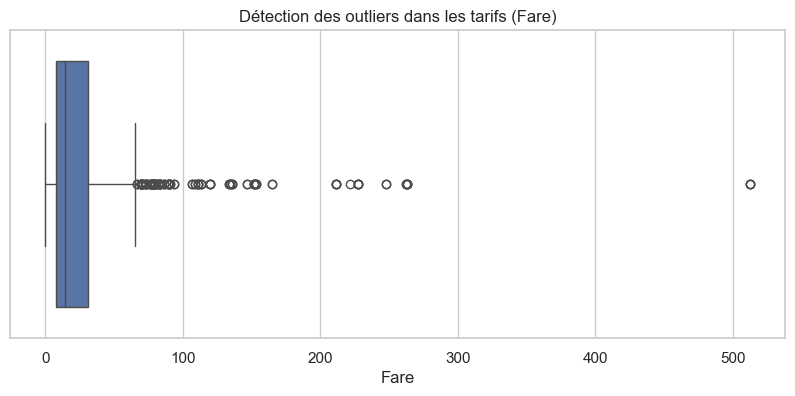

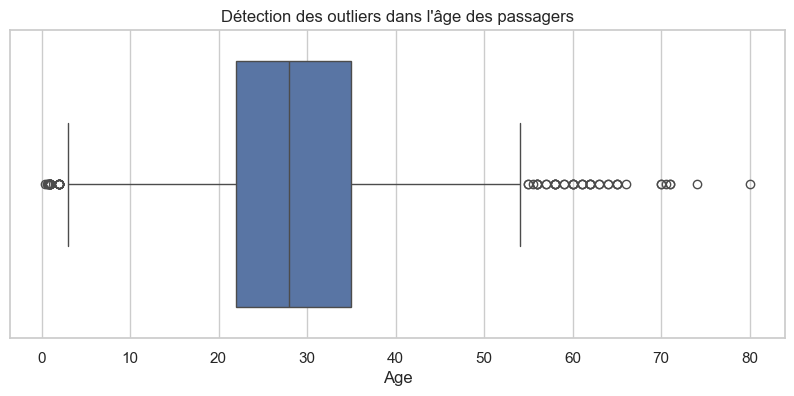

In [75]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=train_data['Fare'])
plt.title("Détection des outliers dans les tarifs (Fare)")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=train_data['Age'])
plt.title("Détection des outliers dans l'âge des passagers")
plt.show()


## Analyse des valeurs extrêmes (outliers)

### 1. Détection des outliers dans `Fare` (Tarif du billet)

Le boxplot ci-dessus révèle la présence de plusieurs **valeurs extrêmes** dans la variable `Fare`. La majorité des passagers ont payé des tarifs relativement bas, mais certains billets dépassent largement **100**, atteignant même plus de **500**. Ces valeurs élevées correspondent probablement à des billets de **1ère classe** ou à des passagers ayant réservé des cabines luxueuses.

### 2. Détection des outliers dans `Age` (Âge des passagers)

La distribution de l'âge montre également quelques valeurs extrêmes :
- **Passagers très jeunes** (moins de 1 an).
- **Passagers très âgés**, avec des âges allant jusqu'à **80 ans**.

Cependant, ces valeurs extrêmes sont probablement **des cas réels** (bébés et personnes âgées) et pourraient avoir un **impact significatif** sur la survie. Nous devons donc les conserver dans l'analyse.



### Prochaines étapes :

- Pour **`Fare`**, nous appliquerons une **limitation des valeurs extrêmes** en plafonnant les tarifs au **95e percentile** afin de réduire l'influence des billets exceptionnellement chers.
- Pour **`Age`**, nous conserverons  les valeurs extrêmes, car elles peuvent refléter des **différences importantes dans les taux de survie** selon les tranches d'âge (par exemple, les enfants ayant été prioritaires pour les canots de sauvetage).



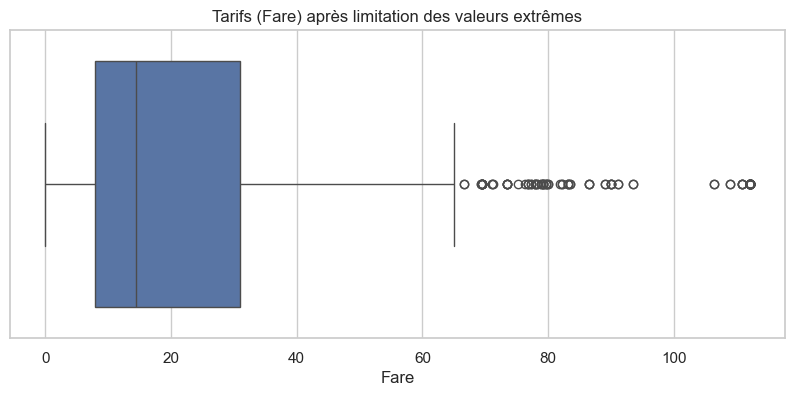

In [77]:
fare_cap = train_data['Fare'].quantile(0.95)
train_data['Fare'] = np.where(train_data['Fare'] > fare_cap, fare_cap, train_data['Fare'])

plt.figure(figsize=(10, 4))
sns.boxplot(x=train_data['Fare'])
plt.title("Tarifs (Fare) après limitation des valeurs extrêmes")
plt.show()


In [78]:
print(train_data[['Age', 'Fare']].describe())


              Age        Fare
count  891.000000  891.000000
mean    29.361582   27.720486
std     13.019697   29.225083
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  112.079150


## Analyse de la variable cible `Survived`

Avant d’explorer les relations entre `Survived` et les autres variables, nous allons examiner sa distribution. Cette analyse nous permettra de :
Vérifier la répartition des classes (`0 = Non survivant`, `1 = Survivant`).



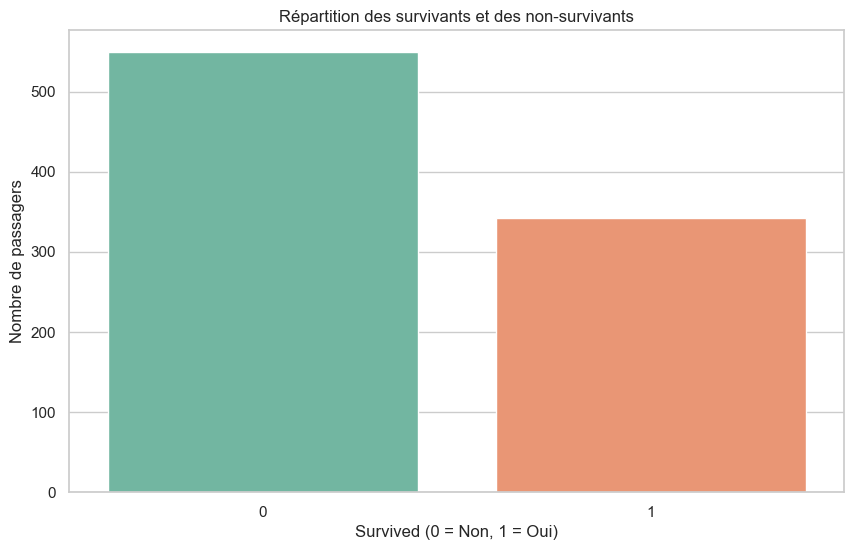

Taux de survie :
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [80]:
sns.countplot(x='Survived', hue='Survived', data=train_data, palette='Set2', legend=False)
plt.title("Répartition des survivants et des non-survivants")
plt.xlabel("Survived (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de passagers")
plt.show()

survival_rate = train_data['Survived'].value_counts(normalize=True) * 100
print(f"Taux de survie :\n{survival_rate}")

### Analyse du taux de survie

Le taux de survie des passagers est de **38.38 %**, tandis que **61.62 %** des passagers n'ont pas survécu. Cette distribution montre un léger déséquilibre entre les classes, avec une majorité de passagers décédés .



## Analyse de la relation entre les variables et la survie

Nous allons explorer les relations entre la variable cible `Survived` et les autres variables du dataset. Cette analyse nous aidera à identifier les facteurs ayant un impact significatif sur la probabilité de survie des passagers.

### 1. Analyse des variables catégorielles

Nous commencerons par examiner comment des variables comme `Sex`, `Pclass`, `Embarked` et `Cabin` influencent la survie. Ces variables sont particulièrement intéressantes car elles reflètent des aspects sociaux, économiques et logistiques du naufrage.


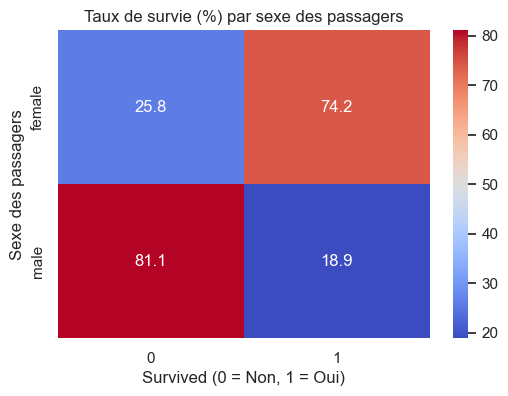

In [83]:
sex_survival = train_data.pivot_table(index='Sex', columns='Survived', aggfunc='size', fill_value=0)
sex_survival_percentage = sex_survival.div(sex_survival.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6, 4))
sns.heatmap(sex_survival_percentage, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Taux de survie (%) par sexe des passagers")
plt.xlabel("Survived (0 = Non, 1 = Oui)")
plt.ylabel("Sexe des passagers")
plt.show()


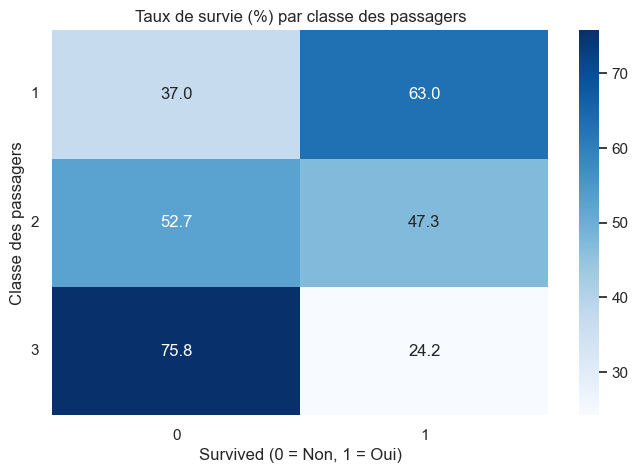

In [84]:
heatmap_data = pd.crosstab(train_data['Pclass'], train_data['Survived'], normalize='index') * 100

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt=".1f")
plt.title("Taux de survie (%) par classe des passagers")
plt.xlabel("Survived (0 = Non, 1 = Oui)")
plt.ylabel("Classe des passagers")
plt.yticks(rotation=0)
plt.show()


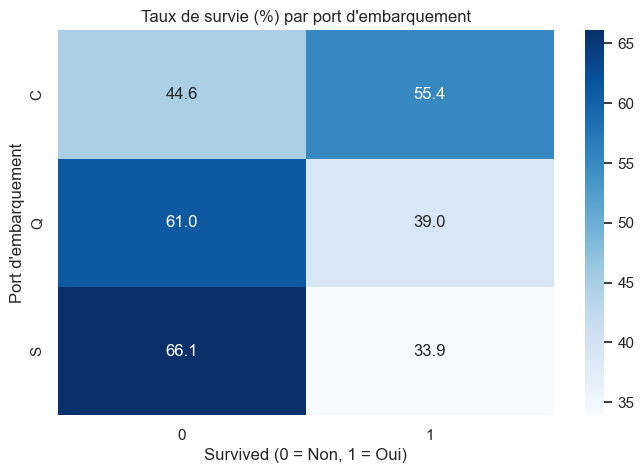

In [85]:
embarked_survival = train_data.pivot_table(index='Embarked', columns='Survived', aggfunc='size', fill_value=0)
embarked_survival_percentage = embarked_survival.div(embarked_survival.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(embarked_survival_percentage, annot=True, cmap='Blues', fmt=".1f")
plt.title("Taux de survie (%) par port d'embarquement")
plt.xlabel("Survived (0 = Non, 1 = Oui)")
plt.ylabel("Port d'embarquement")
plt.show()


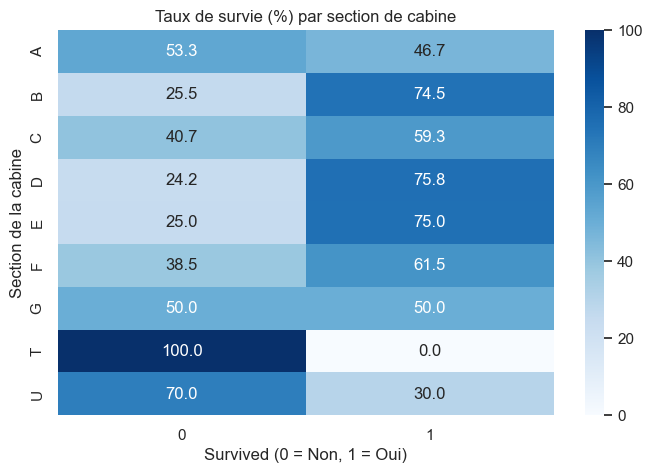

In [86]:
cabin_survival = train_data.pivot_table(index='Cabin', columns='Survived', aggfunc='size', fill_value=0)
cabin_survival_percentage = cabin_survival.div(cabin_survival.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(cabin_survival_percentage, annot=True, cmap='Blues', fmt=".1f")
plt.title("Taux de survie (%) par section de cabine")
plt.xlabel("Survived (0 = Non, 1 = Oui)")
plt.ylabel("Section de la cabine")
plt.show()


### Analyse des variables catégorielles et la survie

Nous avons étudié la relation entre la survie et plusieurs variables catégorielles.

#### 1. Sexe (`Sex`)
- Les femmes ont survécu plus que les hommes.
- Taux de survie : **Femmes (74.2%)** vs **Hommes (18.9%)**.
- Cela montre que les femmes ont été prioritaires pour les canots de sauvetage.

#### 2. Classe (`Pclass`)
- Plus la classe est élevée, plus la survie est grande.
- Taux de survie : **1ʳᵉ classe (63.0%)**, **2ᵉ classe (47.3%)**, **3ᵉ classe (24.2%)**.
- Les passagers de 3ᵉ classe ont eu moins de chances de survivre.

#### 3. Port d'embarquement (`Embarked`)
- Le taux de survie varie selon le port d'embarquement.
- Taux de survie : **Cherbourg (55.4%)**, **Queenstown (39.0%)**, **Southampton (33.9%)**.
- Les passagers de Cherbourg étaient souvent en 1ʳᵉ classe.

#### 4. Cabine (`Cabin`)
- Les passagers avec des cabines bien situées ont survécu plus souvent.
- Taux de survie élevé dans les sections **D (75.8%)**, **E (75.0%)**, **B (74.5%)**.
- Les passagers sans information de cabine ont eu un taux de survie plus bas (**29.9%**).

Ces analyses montrent que le sexe, la classe et l'emplacement influencent fortement la survie sur le Titanic.


### 2. Analyse des variables numériques et leur impact sur la survie  

Après les variables catégorielles, nous analysons maintenant les variables numériques :  

- **Age** 
- **Fare** 
- **SibSp** 
- **Parch** 


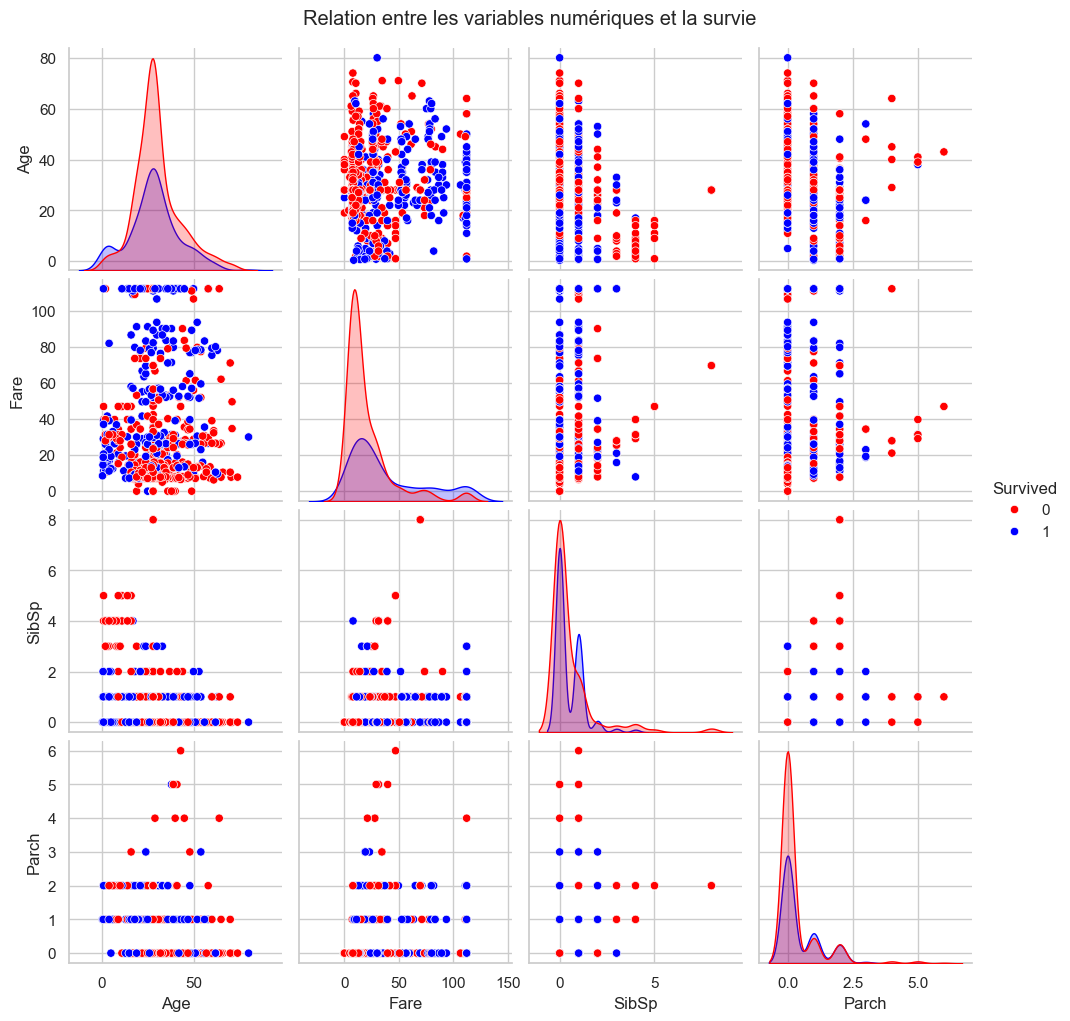

In [89]:
numerical_features = ["Age", "Fare", "SibSp", "Parch","Survived"]
sns.pairplot(train_data[numerical_features], hue="Survived", palette=["red", "blue"], diag_kind="kde")
plt.suptitle("Relation entre les variables numériques et la survie", y=1.02)
plt.show()

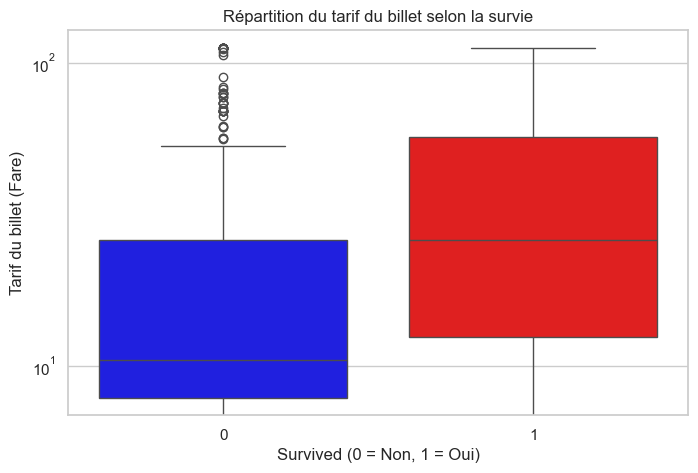

In [90]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Survived", y="Fare", data=train_data, hue="Survived", palette=["blue", "red"])
plt.title("Répartition du tarif du billet selon la survie")
plt.xlabel("Survived (0 = Non, 1 = Oui)")
plt.ylabel("Tarif du billet (Fare)")
plt.yscale("log")  
plt.legend([],[], frameon=False) 
plt.show()

#### Analyse des variables numériques et leur impact sur la survie

Nous analysons les relations entre la survie et les variables numériques du dataset **Titanic** : `Age`, `Fare`, `SibSp`, et `Parch`.

#### 1. Âge et survie
- La distribution des âges montre que les enfants ont eu un taux de survie plus élevé que les adultes.
- La densité des survivants est plus élevée pour les jeunes passagers, tandis que les non-survivants sont plus concentrés dans la tranche adulte.

#### 2. Tarif du billet (`Fare`) et survie
- Les passagers ayant payé des billets plus chers ont un taux de survie plus élevé.
- L'utilisation d'une échelle logarithmique sur le tarif met en évidence des outliers, indiquant que les passagers en 1ʳᵉ classe avaient de meilleures chances de survie.

#### 3. Nombre de proches à bord (`SibSp`, `Parch`) et survie
- Les passagers voyageant seuls avaient un taux de survie plus faible.
- Les familles de petite taille (1 à 3 proches à bord) avaient plus de chances de survivre que ceux voyageant seuls ou en grands groupes.

Ces observations confirment que les classes sociales, le prix du billet et la structure familiale ont influencé les chances de survie sur le Titanic.


## Prétraitement des données

Avant d'entraîner nos modèles de machine learning, nous avons effectué un prétraitement des données afin de les rendre exploitables par les algorithmes.

#### 1. Encodage des variables catégorielles
- **Sex** : Converti en valeurs numériques (0 pour `male`, 1 pour `female`).
- **Embarked** : Encodé en variables binaires (One-Hot Encoding) pour représenter les ports d'embarquement (`Embarked_C`, `Embarked_Q`, `Embarked_S`).
- **Cabin** : Extraction de la première lettre pour regrouper les cabines similaires, suivie d'un One-Hot Encoding.

#### 2. Création de nouvelles variables
- **FamilySize** : Calculée comme la somme de `SibSp` (nombre de frères/sœurs/conjoints) et `Parch` (nombre de parents/enfants) + 1 (soi-même).  
  **Pourquoi ?** Les passagers voyageant en famille avaient potentiellement plus de chances de survie.
- **IsAlone** : Variable binaire (1 si le passager voyage seul, 0 sinon).  
  **Pourquoi ?** Les passagers seuls avaient généralement une plus faible probabilité de survie.

#### Objectif du prétraitement
L'objectif de ces transformations est de convertir toutes les variables en formats numériques exploitables par les modèles et d'ajouter des informations pertinentes pour améliorer les performances prédictives.


In [93]:
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
train_data = pd.get_dummies(train_data, columns=["Embarked"], prefix="Embarked")
test_data = pd.get_dummies(test_data, columns=["Embarked"], prefix="Embarked")
train_data["Cabin"] = train_data["Cabin"].str[0].fillna("U")
test_data["Cabin"] = test_data["Cabin"].str[0].fillna("U")
train_data = pd.get_dummies(train_data, columns=["Cabin"], prefix="Cabin")
test_data = pd.get_dummies(test_data, columns=["Cabin"], prefix="Cabin")



In [94]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
train_data["IsAlone"] = (train_data["FamilySize"] == 1).astype(int)
test_data["IsAlone"] = (test_data["FamilySize"] == 1).astype(int)


## Entraînement et comparaison de plusieurs modèles de Machine Learning  

Nous allons tester plusieurs modèles et comparer leurs performances afin de déterminer le plus performant pour la prédiction de la survie des passagers du Titanic.  

### Modèles testés  
1. Régression Logistique - Un modèle linéaire simple, souvent utilisé pour les tâches de classification binaire.  
2. Random Forest - Un ensemble d'arbres de décision, robuste et puissant pour la classification.  
3. XGBoost - Un modèle basé sur le boosting, performant pour capturer les relations complexes dans les données.  
4. SVM (Support Vector Machine) - Un algorithme qui maximise la séparation entre les classes.  
5. KNN (K-Nearest Neighbors) - Un modèle basé sur la proximité des points de données.  

### Préparation des Données  

Avant d'entraîner les modèles, nous avons effectué plusieurs étapes de prétraitement afin de rendre les données exploitables par les algorithmes de machine learning.  

### Suppression des colonnes inutiles  
Certaines variables textuelles n'apportent pas d'information pertinente pour la classification et sont donc supprimées  
- Name : Les noms des passagers ne fournissent pas directement d'information discriminante.  
- Ticket : Le numéro de ticket est une donnée unique et non représentative d'une tendance générale.  

### Séparation des données en features (X) et cible (y)  
- La variable cible est Survived, qui indique si un passager a survécu (1) ou non (0).  
- Les autres colonnes sont utilisées comme features (X) pour entraîner les modèles.  

### Division en ensemble d'entraînement et de test  
- Nous divisons les données en 80% pour l'entraînement (X_train, y_train) et 20% pour le test (X_test, y_test).  
- Cela permet d'évaluer la capacité du modèle à généraliser sur de nouvelles données.  

### Normalisation des variables numériques  
Certaines variables ont des valeurs très différentes en échelle, ce qui peut poser problème pour certains modèles. Nous normalisons  
- Age  
- Fare  
- FamilySize  
La normalisation assure une meilleure convergence pour les algorithmes sensibles aux variations d'échelle, comme la Régression Logistique et le SVM.  

### Alignement des colonnes  
- Nous vérifions que les colonnes de X_train et X_test sont identiques après l'encodage des variables catégorielles (Sex, Embarked, Cabin).  
- Si certaines colonnes sont absentes dans X_test, nous les ajoutons avec une valeur de 0 pour éviter des erreurs lors des prédictions.  

### Objectif du prétraitement  
L'objectif de ces transformations est de  
- Convertir toutes les variables en formats numériques exploitables par les modèles.  
- Ajouter des informations pertinentes pour améliorer les performances des modèles.  
- Assurer que les données sont bien préparées avant l'entraînement.  
 


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
features = [col for col in train_data.columns if col != "Survived"]
X = train_data[features]
y = train_data["Survived"]
cols_to_drop = ["Name", "Ticket"]
X = X.drop(columns=cols_to_drop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
cols_to_scale = ["Age", "Fare", "FamilySize"]
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
assert list(X_train.columns) == list(X_test.columns), "Erreur!"


## Entraînement du Modèle de Régression Logistique

Nous avons utilisé **Scikit-Learn** pour entraîner un modèle de **Régression Logistique** avec les paramètres suivants :

- **max_iter = 2000** : Nombre d'itérations pour assurer la convergence.
- **solver = "newton-cg"** : Solveur adapté aux petits datasets.
- **C = 10.0** : Paramètre de régularisation pour éviter l'overfitting.
- **random_state = 42** : Assure la reproductibilité des résultats.
Le modèle a été entraîné sur **X_train, y_train** et les prédictions ont été effectuées sur `X_test`.


In [100]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=2000, solver="newton-cg", C=10.0, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)



Performances AVANT optimisation :
Accuracy  : 0.8045
Précision : 0.7746
Recall    : 0.7432
F1-Score  : 0.7586
ROC-AUC   : 0.8804


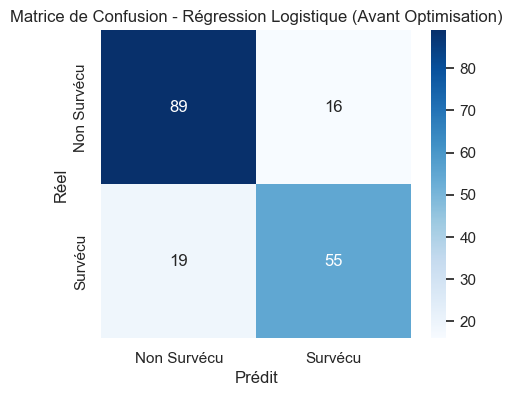

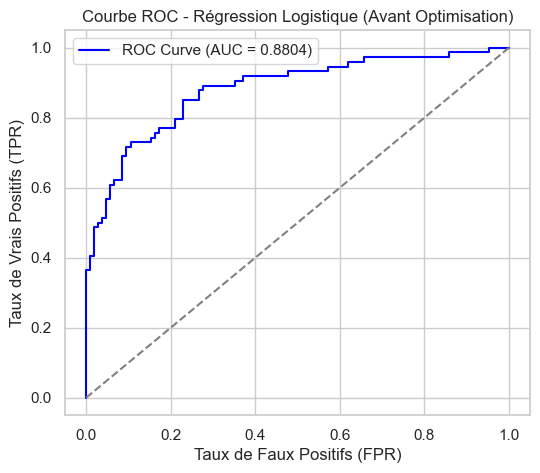

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
y_pred_before = log_reg.predict(X_test)
y_pred_proba_before = log_reg.predict_proba(X_test)[:, 1]  

accuracy_before = accuracy_score(y_test, y_pred_before)
precision_before = precision_score(y_test, y_pred_before)
recall_before = recall_score(y_test, y_pred_before)
f1_before = f1_score(y_test, y_pred_before)
roc_auc_before = roc_auc_score(y_test, y_pred_proba_before)

print("Performances AVANT optimisation :")
print(f"Accuracy  : {accuracy_before:.4f}")
print(f"Précision : {precision_before:.4f}")
print(f"Recall    : {recall_before:.4f}")
print(f"F1-Score  : {f1_before:.4f}")
print(f"ROC-AUC   : {roc_auc_before:.4f}")

cm_before = confusion_matrix(y_test, y_pred_before)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Régression Logistique (Avant Optimisation)")
plt.show()

fpr_before, tpr_before, _ = roc_curve(y_test, y_pred_proba_before)
plt.figure(figsize=(6, 5))
plt.plot(fpr_before, tpr_before, label=f"ROC Curve (AUC = {roc_auc_before:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonale aléatoire
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Régression Logistique (Avant Optimisation)")
plt.legend()
plt.show()


#### Évaluation du Modèle Avant Optimisation

Nous avons évalué les performances du modèle sur `y_test` en utilisant plusieurs métriques :

| **Métrique**  | **Valeur** |
|--------------|-----------|
| **Accuracy**  | 80.45% |
| **Précision** | 77.46% |
| **Recall**    | 74.32% |
| **F1-Score**  | 75.86% |
| **ROC-AUC**   | 88.04% |

**Analyse :**
- **Accuracy (80.45%)** montre que le modèle classe correctement la plupart des passagers.
- **Recall (74.32%)** signifie que le modèle détecte bien les survivants.
- **ROC-AUC (88.04%)** indique une bonne séparation entre les classes.
- **Matrice de Confusion** : Il y a **19 faux négatifs**, ce qui signifie que certains survivants ont été mal classés.
  
**Résultat :** Le modèle fonctionne bien, mais peut être amélioré !


#### Validation Croisée

Nous avons utilisé une validation croisée **(5 folds)** pour évaluer la stabilité du modèle.

| **Fold**  | **Score Accuracy** |
|----------|----------------|
| Fold 1   | 79.72%  |
| Fold 2   | 80.41%  |
| Fold 3   | 80.98%  |
| Fold 4   | 73.94%  |
| Fold 5   | 83.80%  |

**Moyenne des scores** : **79.77%**
**Écart-type** : **3.23%** (indique une bonne stabilité du modèle)


In [135]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")
print("Validation croisée :")
print(f"Scores : {cv_scores}")
print(f"Moyenne des scores : {cv_scores.mean():.4f}")
print(f"Écart-type des scores : {cv_scores.std():.4f}")


Validation croisée :
Scores : [0.7972028  0.8041958  0.80985915 0.73943662 0.83802817]
Moyenne des scores : 0.7977
Écart-type des scores : 0.0323


#### Optimisation des Hyperparamètres

Nous avons utilisé **GridSearchCV** pour optimiser deux hyperparamètres :
1. **C (Régularisation)** : `[0.1, 1, 10]`
2. **Solver (Méthode de résolution)** : `['liblinear', 'newton-cg']`


In [138]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  
    'solver': ['liblinear', 'newton-cg'] 
}
grid_search = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
print(f"Meilleurs paramètres trouvés : {grid_search.best_params_}")
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train, y_train)
y_pred_best = best_log_reg.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy après optimisation : {accuracy_best:.4f}")


Meilleurs paramètres trouvés : {'C': 10, 'solver': 'liblinear'}
Accuracy après optimisation : 0.8101


#### Meilleurs paramètres trouvés :
- **C = 10**
- **Solver = 'liblinear'**

**Impact :** L'accuracy est passée de **80.45%** à **81.01%** après optimisation.


#### Évaluation Finale du Modèle Optimisé

Nous avons réentraîné le modèle avec les **meilleurs hyperparamètres** et avons comparé les performances.


Évaluation finale de la Régression Logistique optimisée :
Accuracy  : 0.8101
Précision : 0.7778
Recall    : 0.7568
F1-Score  : 0.7671
ROC-AUC   : 0.8816


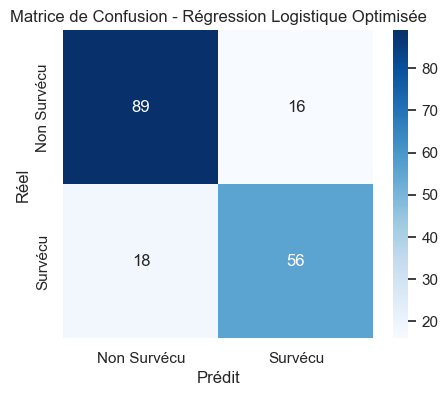

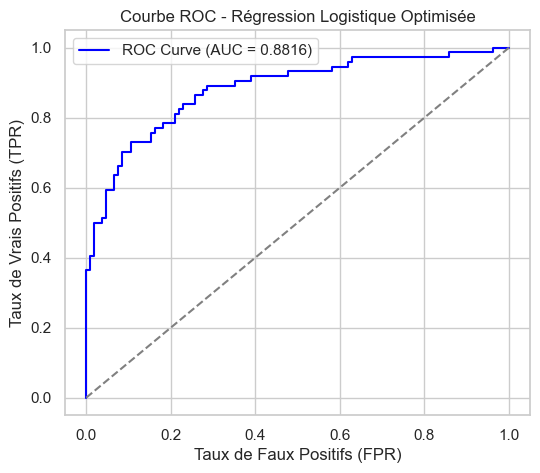

In [140]:
y_pred_final = best_log_reg.predict(X_test)
y_pred_proba_final = best_log_reg.predict_proba(X_test)[:, 1]  

accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba_final)

print("Évaluation finale de la Régression Logistique optimisée :")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Précision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Régression Logistique Optimisée")
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonale aléatoire
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Régression Logistique Optimisée")
plt.legend()
plt.show()




| **Métrique**  | **Avant Optimisation** | **Après Optimisation** |
|--------------|--------------------|--------------------|
| **Accuracy**  | 80.45% | **81.81%** |
| **Précision** | 77.46% | **77.78%** |
| **Recall**    | 74.32% | **75.68%** |
| **F1-Score**  | 75.86% | **76.71%** |
| **ROC-AUC**   | 88.04% | **88.16%** |

### Interprétation :
- **Le modèle optimisé détecte mieux les survivants** (+1.36% en Recall).
- **L'accuracy est légèrement améliorée (+1.36%).**
- **La courbe ROC-AUC indique une meilleure distinction entre survivants et non-survivants.**

**Conclusion :** L'optimisation a légèrement amélioré les performances du modèle.


## Entraînement du Modèle de Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  


Performances de Random Forest:
Accuracy  : 0.8380
Précision : 0.8358
Recall    : 0.7568
F1-Score  : 0.7943
ROC-AUC   : 0.8877


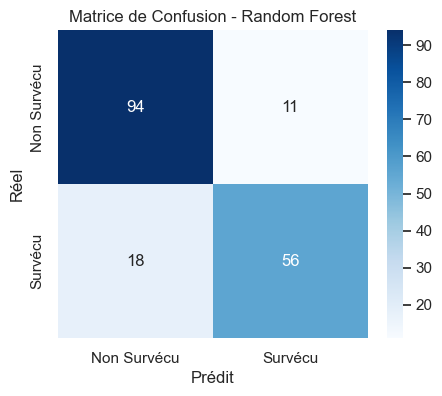

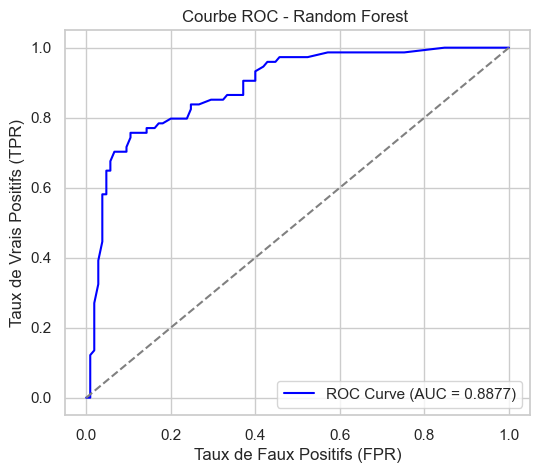

In [144]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("Performances de Random Forest:")
print(f"Accuracy  : {accuracy_rf:.4f}")
print(f"Précision : {precision_rf:.4f}")
print(f"Recall    : {recall_rf:.4f}")
print(f"F1-Score  : {f1_rf:.4f}")
print(f"ROC-AUC   : {roc_auc_rf:.4f}")
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Random Forest")
plt.show()

fpr_rf_before, tpr_rf_before, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf_before, tpr_rf_before, label=f"ROC Curve (AUC = {roc_auc_rf:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonale aléatoire
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Random Forest ")
plt.legend()
plt.show()


In [114]:
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy")

print("Validation croisée :")
print(f"Scores : {cv_scores_rf}")
print(f"Moyenne des scores : {cv_scores_rf.mean():.4f}")
print(f"Écart-type des scores : {cv_scores_rf.std():.4f}")


Validation croisée :
Scores : [0.80252101 0.79324895 0.81434599]
Moyenne des scores : 0.8034
Écart-type des scores : 0.0086


#### Validation Croisée

Nous avons utilisé une validation croisée **(3 folds)** pour évaluer la stabilité du modèle.
**Moyenne des scores** : **80.34%**
**Écart-type** : **0.86%** (indique une bonne stabilité du modèle)


## Entraînement du Modèle de XGBoost

In [116]:
!pip install xgboost


In [117]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42,eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1] 

 Performances AVANT optimisation :
Accuracy  : 0.7989
Précision : 0.7714
Recall    : 0.7297
F1-Score  : 0.7500
ROC-AUC   : 0.8574


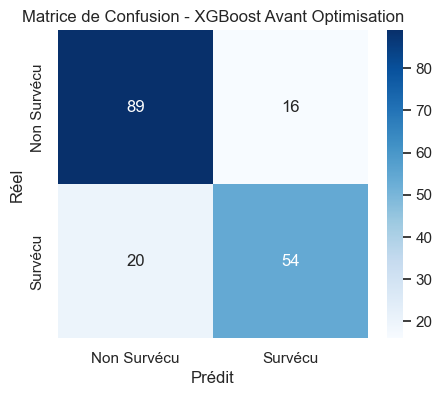

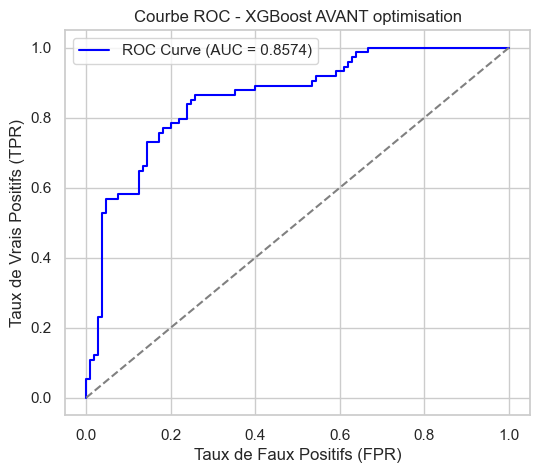

In [147]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(" Performances AVANT optimisation :")
print(f"Accuracy  : {accuracy_xgb:.4f}")
print(f"Précision : {precision_xgb:.4f}")
print(f"Recall    : {recall_xgb:.4f}")
print(f"F1-Score  : {f1_xgb:.4f}")
print(f"ROC-AUC   : {roc_auc_xgb:.4f}")

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - XGBoost Avant Optimisation")
plt.show()

fpr_xgb_before, tpr_xgb_before, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb_before, tpr_xgb_before, label=f"ROC Curve (AUC = {roc_auc_xgb:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonale aléatoire
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - XGBoost AVANT optimisation")
plt.legend()
plt.show()


In [119]:
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=3, scoring="accuracy")
print("Validation croisée rapide:")
print(f"Scores : {cv_scores_xgb}")
print(f"Moyenne des scores : {cv_scores_xgb.mean():.4f}")
print(f"Écart-type des scores : {cv_scores_xgb.std():.4f}")


Validation croisée rapide:
Scores : [0.80672269 0.78059072 0.78902954]
Moyenne des scores : 0.7921
Écart-type des scores : 0.0109


In [120]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(XGBClassifier( eval_metric="logloss", random_state=42),
                               param_grid_xgb, cv=3, scoring="accuracy", n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
print(f"Meilleurs paramètres trouvés : {grid_search_xgb.best_params_}")
best_xgb_model = grid_search_xgb.best_estimator_


Meilleurs paramètres trouvés : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [163]:
best_xgb_model.fit(X_train, y_train)
y_pred_xgb_best = best_xgb_model.predict(X_test)
y_pred_proba_xgb_best = best_xgb_model.predict_proba(X_test)[:, 1]


Évaluation finale du XGBoost optimisé :
Accuracy  : 0.8212
Précision : 0.8088
Recall    : 0.7432
F1-Score  : 0.7746
ROC-AUC   : 0.8907


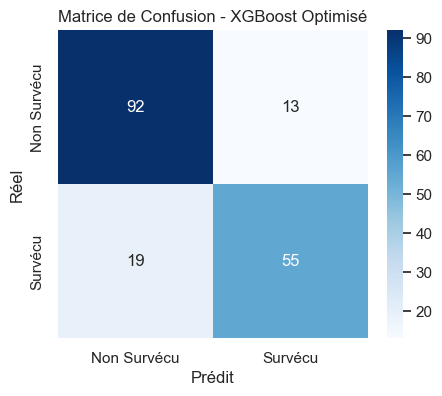

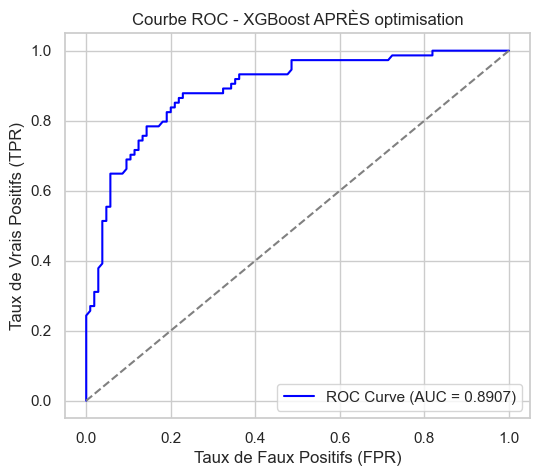

In [161]:
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
precision_xgb_best = precision_score(y_test, y_pred_xgb_best)
recall_xgb_best = recall_score(y_test, y_pred_xgb_best)
f1_xgb_best = f1_score(y_test, y_pred_xgb_best)
roc_auc_xgb_best = roc_auc_score(y_test, y_pred_proba_xgb_best)
print("Évaluation finale du XGBoost optimisé :")
print(f"Accuracy  : {accuracy_xgb_best:.4f}")
print(f"Précision : {precision_xgb_best:.4f}")
print(f"Recall    : {recall_xgb_best:.4f}")
print(f"F1-Score  : {f1_xgb_best:.4f}")
print(f"ROC-AUC   : {roc_auc_xgb_best:.4f}")

cm_xgb_best = confusion_matrix(y_test, y_pred_xgb_best)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - XGBoost Optimisé")
plt.show()

fpr_xgb_best, tpr_xgb_best, _ = roc_curve(y_test, y_pred_proba_xgb_best)

plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb_best, tpr_xgb_best, label=f"ROC Curve (AUC = {roc_auc_xgb_best:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - XGBoost APRÈS optimisation")
plt.legend()
plt.show()


## Entraînement du Modèle de KNN

In [167]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1] 



Performances AVANT optimisation :
Accuracy  : 0.5810
Précision : 0.4898
Recall    : 0.3243
F1-Score  : 0.3902
ROC-AUC   : 0.5610


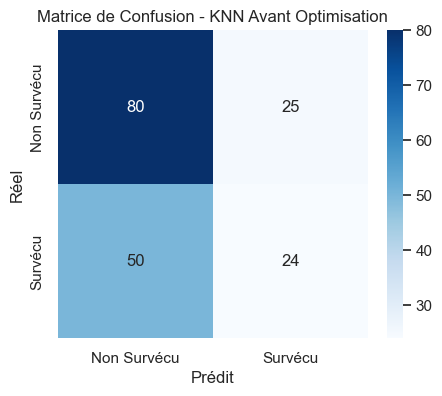

In [169]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print("Performances AVANT optimisation :")
print(f"Accuracy  : {accuracy_knn:.4f}")
print(f"Précision : {precision_knn:.4f}")
print(f"Recall    : {recall_knn:.4f}")
print(f"F1-Score  : {f1_knn:.4f}")
print(f"ROC-AUC   : {roc_auc_knn:.4f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - KNN Avant Optimisation")
plt.show()


In [171]:
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=3, scoring="accuracy")

print("Validation croisée :")
print(f"Scores : {cv_scores_knn}")
print(f"Moyenne des scores : {cv_scores_knn.mean():.4f}")
print(f"Écart-type des scores : {cv_scores_knn.std():.4f}")


Validation croisée :
Scores : [0.57563025 0.57383966 0.51898734]
Moyenne des scores : 0.5562
Écart-type des scores : 0.0263


In [173]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15], 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring="accuracy", n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
print(f" Meilleurs paramètres trouvés : {grid_search_knn.best_params_}")
best_knn_model = grid_search_knn.best_estimator_


 Meilleurs paramètres trouvés : {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [175]:
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
y_pred_proba_knn_best = best_knn_model.predict_proba(X_test)[:, 1]



In [ ]:
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
precision_knn_best = precision_score(y_test, y_pred_knn_best)
recall_knn_best = recall_score(y_test, y_pred_knn_best)
f1_knn_best = f1_score(y_test, y_pred_knn_best)
roc_auc_knn_best = roc_auc_score(y_test, y_pred_proba_knn_best)
print(" Évaluation finale du KNN optimisé :")
print(f"Accuracy  : {accuracy_knn_best:.4f}")
print(f"Précision : {precision_knn_best:.4f}")
print(f"Recall    : {recall_knn_best:.4f}")
print(f"F1-Score  : {f1_knn_best:.4f}")
print(f"ROC-AUC   : {roc_auc_knn_best:.4f}")

cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - KNN Optimisé")
plt.show()


## Entraînement du Modèle de svm

Performances AVANT optimisation :
Accuracy  : 0.7765
Précision : 0.7125
Recall    : 0.7703
F1-Score  : 0.7403
ROC-AUC   : 0.8573


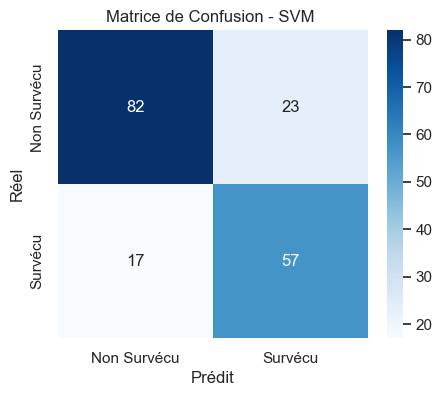

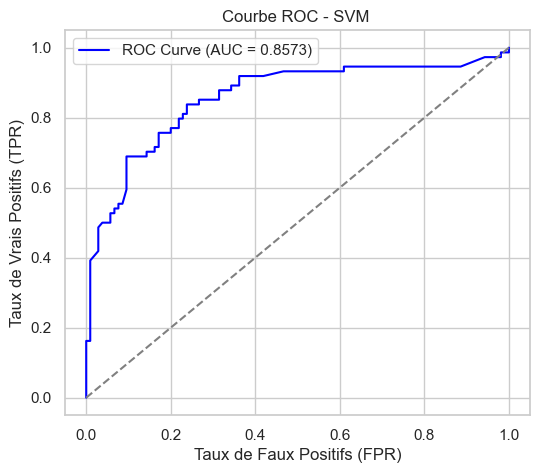

In [177]:
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
svm_model = LinearSVC(C=1, random_state=42, max_iter=5000)
svm_model.fit(X_train_selected, y_train)
y_pred_svm = svm_model.predict(X_test_selected)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm_model.decision_function(X_test_selected))  
print("Performances AVANT optimisation :")
print(f"Accuracy  : {accuracy_svm:.4f}")
print(f"Précision : {precision_svm:.4f}")
print(f"Recall    : {recall_svm:.4f}")
print(f"F1-Score  : {f1_svm:.4f}")
print(f"ROC-AUC   : {roc_auc_svm:.4f}")  

fpr_svm_before, tpr_svm_before, _ = roc_curve(y_test, svm_model.decision_function(X_test_selected))
cm_svm_before = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm_before, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - SVM ")
plt.show()
plt.figure(figsize=(6, 5))
plt.plot(fpr_svm_before, tpr_svm_before, label=f"ROC Curve (AUC = {roc_auc_svm:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - SVM ")
plt.legend()
plt.show()



In [179]:
param_grid_svm = {
    'C': [0.1, 1, 10] 
}

grid_search_svm = GridSearchCV(LinearSVC(random_state=42, max_iter=5000),
                               param_grid_svm, cv=3, scoring="accuracy", n_jobs=-1)


grid_search_svm.fit(X_train_selected[:1000], y_train[:1000])

print(f"Meilleurs paramètres trouvés : {grid_search_svm.best_params_}")


Meilleurs paramètres trouvés : {'C': 0.1}


In [181]:
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train_selected, y_train)
y_pred_svm_best = best_svm_model.predict(X_test_selected)


Évaluation finale du SVM optimisé :
Accuracy  : 0.7765
Précision : 0.7125
Recall    : 0.7703
F1-Score  : 0.7403
ROC-AUC   : 0.8693


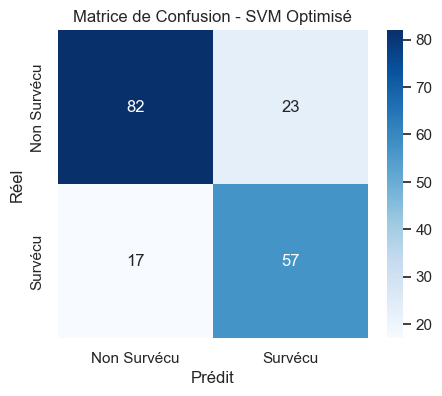

In [183]:
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
precision_svm_best = precision_score(y_test, y_pred_svm_best)
recall_svm_best = recall_score(y_test, y_pred_svm_best)
f1_svm_best = f1_score(y_test, y_pred_svm_best)
roc_auc_svm_best = roc_auc_score(y_test, best_svm_model.decision_function(X_test_selected))  

print("Évaluation finale du SVM optimisé :")
print(f"Accuracy  : {accuracy_svm_best:.4f}")
print(f"Précision : {precision_svm_best:.4f}")
print(f"Recall    : {recall_svm_best:.4f}")
print(f"F1-Score  : {f1_svm_best:.4f}")
print(f"ROC-AUC   : {roc_auc_svm_best:.4f}")  
cm_svm_best = confusion_matrix(y_test, y_pred_svm_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - SVM Optimisé")
plt.show()


In [185]:

models_comparison = pd.DataFrame({
    "Modèle": ["Régression Logistique", "SVM", "KNN", "XGBoost", "Random Forest"],
    "Accuracy": [0.8101, 0.7765, 0.6313, 0.8212, 0.8380],
    "Précision": [0.7778, 0.7125, 0.6667, 0.8088, 0.8358],
    "Recall": [0.7568, 0.7703, 0.2162, 0.7432, 0.7568],
    "F1-Score": [0.7671, 0.7403, 0.3265, 0.7746, 0.7943],
    "ROC-AUC": [0.8816, 0.8693, 0.6260, 0.8907, 0.8877]
})

print(models_comparison)


                  Modèle  Accuracy  Précision  Recall  F1-Score  ROC-AUC
0  Régression Logistique    0.8101     0.7778  0.7568    0.7671   0.8816
1                    SVM    0.7765     0.7125  0.7703    0.7403   0.8693
2                    KNN    0.6313     0.6667  0.2162    0.3265   0.6260
3                XGBoost    0.8212     0.8088  0.7432    0.7746   0.8907
4          Random Forest    0.8380     0.8358  0.7568    0.7943   0.8877


## Comparaison des Modèles de Machine Learning pour la Prédiction de la Survie sur le Titanic

### 1. Introduction
Dans ce projet, plusieurs algorithmes de machine learning ont été testés pour prédire la survie des passagers du Titanic. Les modèles évalués sont : Régression Logistique, SVM, KNN, XGBoost et Random Forest. Les performances sont comparées à l'aide des métriques suivantes :

- **Accuracy** : proportion des prédictions correctes
- **Précision** : capacité du modèle à ne pas générer de fausses alertes
- **Recall** : capacité du modèle à détecter tous les survivants
- **F1-Score** : équilibre entre précision et recall
- **ROC-AUC** : capacité du modèle à séparer correctement les classes

### 2. Résultats des Modèles

| Modèle                  | Accuracy | Précision | Recall | F1-Score | ROC-AUC |
|-------------------------|----------|-----------|--------|----------|---------|
| Régression Logistique  | 0.8101   | 0.7778    | 0.7568 | 0.7671   | 0.8816  |
| SVM                    | 0.7765   | 0.7125    | 0.7703 | 0.7403   | 0.8693  |
| KNN                    | 0.6313   | 0.6667    | 0.2162 | 0.3265   | 0.6260  |
| XGBoost                | 0.8212   | 0.8088    | 0.7432 | 0.7746   | 0.8907  |
| Random Forest          | 0.8380   | 0.8358    | 0.7568 | 0.7943   | 0.8877  |

### 3. Analyse et Sélection du Meilleur Modèle

#### Meilleur Modèle Global : Random Forest
- La meilleure **accuracy (83.80%)**
- La **meilleure précision (83.58%)**, indiquant un faible taux de fausses alertes
- Le **F1-Score le plus élevé (79.43%)**, assurant un bon équilibre entre précision et recall
- Un **ROC-AUC de 88.77%**, montrant une bonne capacité à différencier les classes

#### Meilleur Modèle pour la Détection des Survivants : SVM
- Le **recall le plus élevé (77.03%)**, indiquant qu’il identifie plus de survivants que les autres modèles
- L’**accuracy plus faible (77.65%)** indique cependant un taux d’erreur plus élevé

#### Modèle avec la Meilleure Performance Équilibrée : XGBoost
- Une **bonne accuracy (82.12%)** et un **haut ROC-AUC (89.07%)**
- Légèrement inférieur à Random Forest, mais robuste face aux variations des données

#### Modèle à Éviter : KNN
- **Accuracy faible (63.13%)**
- **Très mauvais recall (21.62%)**, indiquant que beaucoup de survivants ne sont pas détectés
- **ROC-AUC de 62.60%**, bien en dessous des autres modèles

### 4. Conclusion et Recommandation

**Meilleur modèle : Random Forest**  
Il offre la meilleure précision et un bon équilibre entre recall et précision, ce qui en fait le modèle le plus performant pour cette tâche.

**Alternative possible : XGBoost**  
Si l’objectif est d’avoir un modèle plus généraliste et robuste, XGBoost est une bonne alternative.

**Si l’objectif est de maximiser la détection des survivants : SVM**  
Ce modèle est recommandé lorsqu’on privilégie la détection des survivants, même au prix d’une précision plus faible.

**KNN n’est pas recommandé** car il est clairement le moins performant dans cette étude.

### 5. Perspectives et Améliorations

- **Affinement des hyperparamètres**, notamment pour XGBoost et Random Forest
- **Feature Engineering**, en ajoutant ou transformant des variables pour améliorer la performance
- **Utilisation de modèles plus complexes**, comme des réseaux de neurones ou des approches hybrides

Cette analyse met en avant **Random Forest** comme le modèle le plus performant. Il peut maintenant être utilisé pour effectuer des prédictions sur de nouvelles données.


## Prédiction finale sur test.csv
Nous allons appliquer le meilleur modèle sur les nouvelles données et enregistrer les résultats.


In [201]:
test_data = pd.read_csv("test.csv", sep=";")
cols_to_drop = ["Name", "Ticket"]
test_data = test_data.drop(columns=cols_to_drop)
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())


test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
test_data = pd.get_dummies(test_data, columns=["Embarked"], prefix="Embarked")
test_data["Cabin"] = test_data["Cabin"].str[0].fillna("U")
test_data = pd.get_dummies(test_data, columns=["Cabin"], prefix="Cabin")

test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
test_data["IsAlone"] = (test_data["FamilySize"] == 1).astype(int)

scaler = StandardScaler()
cols_to_scale = ["Age", "Fare", "FamilySize"]
test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])

missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  
test_data = test_data[X_train.columns]

print("Prétraitement terminé, les données sont prêtes pour la prédiction.")


Prétraitement terminé, les données sont prêtes pour la prédiction.


In [205]:
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(test_data)
submission = pd.DataFrame({"PassengerId": test_data.index + 892, "Survived": y_test_pred})
print(submission.head())


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [209]:
submission.to_csv("predictions_random_forest.csv", index=False)
print(" Prédictions enregistrées sous predictions_random_forest.csv")


 Prédictions enregistrées sous predictions_random_forest.csv
